
# YOLOv2 Concepts and Hands-on Implementation

## 1. Batch Normalization
- **Fundamentals:** Batch normalization helps stabilize learning by distributing activations in mini-batches, allowing the model to learn more efficiently.
- **Highlight:** This reduces internal covariate shift (change in activation distributions during training), speeds up convergence, and improves overall accuracy. In YOLOv2, this allowed for the elimination of additional regularization techniques like dropout.

## 2. High Resolutions
- **Fundamentals:** Using high-resolution images captures finer details, which is crucial for detecting small objects and improving accuracy in general.
- **Highlight:** Training with varied resolutions and testing at a higher resolution (608x608) makes the model more robust to variations in object sizes, enhancing detection capability.

## 3. Anchors
- **Fundamentals:** Anchors allow the model to predict bounding boxes as deviations from a set of predefined boxes, rather than predicting coordinates directly.
- **Highlight:** This simplifies the task of predicting bounding boxes, allowing the model to better handle variations in object size and shape. In YOLOv2, the use of anchors significantly increased recall and detection accuracy.

## 4. Architecture Improvements (Darknet-19)
- **Fundamentals:** A deeper network with better feature extraction capacity can capture more relevant information from the image.
- **Highlight:** Darknet-19, with 19 convolutional layers and 5 max-pooling layers, offers a better balance between depth and computational efficiency, improving both speed and accuracy.

## 5. Loss Function Improvements
- **Fundamentals:** A more refined loss function can better differentiate between good and bad predictions, optimizing the model's accuracy.
- **Highlight:** YOLOv2 introduces specific loss terms to better handle confidence predictions and Intersection over Union (IoU) metrics, reducing false detections and improving accuracy.

## 6. Hierarchies and Joint Training
- **Fundamentals:** Joint training on detection and classification data using hierarchies allows the model to learn richer and more transferable representations.
- **Highlight:** This increases the model's ability to generalize to new object categories, allowing it to detect a wider variety of objects in different contexts.

## 7. Class Prediction
- **Fundamentals:** Handling classes in a weighted manner allows the model to better balance between frequent and rare classes.
- **Highlight:** Improves the model's ability to correctly predict less common classes without sacrificing accuracy on more frequent classes.

## 8. Multi-Scale Training
- **Fundamentals:** Exposing the model to multiple input scales during training allows it to learn features that are invariant to scale changes.
- **Highlight:** This increases the model's robustness to variations in input size, improving performance under different testing conditions.

These improvements make YOLOv2 significantly more accurate and faster than YOLOv1, enabling more effective real-time applications with greater generalization capabilities. In the Following Figure we can see its architectures so we could replicate it with code, following de subsequent layers.


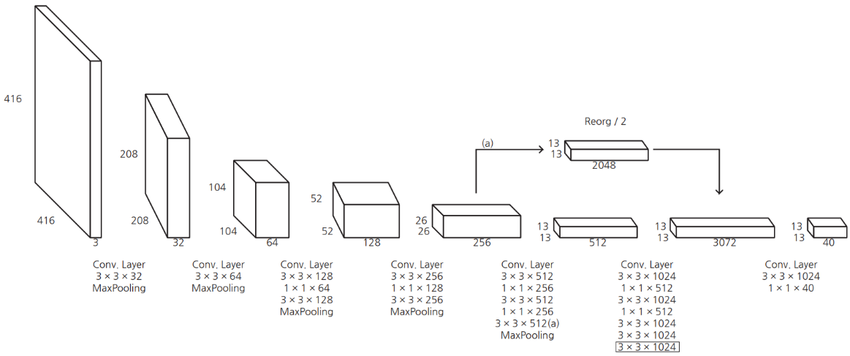

# Hands-on programming of the model
For programming the model with Tensorflow as the easiest way for obtaining a working model and could start to use it and also understand how to use models which are being used in papers we could do the following phases. In some future I also want to learn how to do so using Pytorch as a more pytonic way of doing things, more programatic.

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU, MaxPooling2D, Input, concatenate, Lambda, Reshape, Dropout
from tensorflow.keras.models import Model

def space_to_depth_x2(x):
    return tf.nn.space_to_depth(x, block_size=2)

def yolo_v2(input_shape=(416, 416, 3), num_classes=80, num_boxes=5):
    input_image = Input(shape=input_shape)

    # Layer 1
    x = Conv2D(32, (3,3), strides=(1,1), padding='same', use_bias=False)(input_image)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Layer 2
    x = Conv2D(64, (3,3), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Layer 3
    x = Conv2D(128, (3,3), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Layer 4
    x = Conv2D(64, (1,1), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Layer 5
    x = Conv2D(128, (3,3), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Layer 6
    x = Conv2D(256, (3,3), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Layer 7
    x = Conv2D(128, (1,1), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Layer 8
    x = Conv2D(256, (3,3), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Layer 9
    x = Conv2D(512, (3,3), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Layer 10
    x = Conv2D(256, (1,1), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Layer 11
    x = Conv2D(512, (3,3), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Layer 12
    x = Conv2D(256, (1,1), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Layer 13
    x = Conv2D(512, (3,3), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # As we want to use this connection in following architecture parts,
    # we collect the output of the previous phase and then we will process
    # separately. This is often used to make some realimentation and complex
    # architectures in deep learning and is fundamental to know
    skip_connection = x

    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Layer 14
    x = Conv2D(1024, (3,3), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Layer 15
    x = Conv2D(512, (1,1), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Layer 16
    x = Conv2D(1024, (3,3), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Layer 17
    x = Conv2D(512, (1,1), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Layer 18
    x = Conv2D(1024, (3,3), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Layer 19
    x = Conv2D(1024, (3,3), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Layer 20
    x = Conv2D(1024, (3,3), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)

    # Layer 21
    skip_connection = Conv2D(64, (1,1), strides=(1,1), padding='same', use_bias=False)(skip_connection)
    skip_connection = BatchNormalization()(skip_connection)
    skip_connection = LeakyReLU(alpha=0.1)(skip_connection)

    skip_connection = Lambda(space_to_depth_x2)(skip_connection)

    x = concatenate([skip_connection, x])

    # Layer 22
    x = Conv2D(1024, (3,3), strides=(1,1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Dropout(0.3)(x) # add dropout

    # Layer 23
    x = Conv2D(num_boxes * (4 + 1 + num_classes), (1,1), strides=(1,1), padding='same')(x)
    output = Reshape((13, 13, num_boxes, 4 + 1 + num_classes))(x)

    model = Model(input_image, output)
    return model

model = yolo_v2()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 416, 416, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 416, 416, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 leaky_re_lu (LeakyReLU)     (None, 416, 416, 32)         0         ['batch_normalization[0][0

## Training on a dataset

In [4]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [6]:
!pip install tensorflow

In [8]:
import wandb


# Initialize wandb
wandb.init(project='yolov2-project')
# Load the dataset
# Note: Replace these with your actual dataset loading and preprocessing code
(train_images, train_labels), (val_images, val_labels) = tf.keras.datasets.cifar10.load_data()  # Example dataset

# Training the model
model.fit(
    train_images,
    train_labels,
    validation_data=(val_images, val_labels),
    epochs=50,
    batch_size=32,
    callbacks=[wandb.keras.WandbCallback()]
)

# Log the model
wandb.log({'model': model})

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:


Abort: 

# Measuring FPS for having track on wandb and compare models
This is an important phase for our project and for the edge development in the way that we are fighting against time and trying to obtain better real-time algorithms and aplying them to real cases.

The function will measure the fps and then using this function we are going to save the result on wandb as a characteristic which we could use to compare models.


In [ ]:
# Measure FPS
def measure_fps(model, dataset, batch_size=32, num_batches=10):
    import time
    # Select a subset of the dataset
    subset = tf.data.Dataset.from_tensor_slices(dataset).batch(batch_size).take(num_batches)
    # Warm-up
    for images, labels in subset:
        _ = model.predict(images)

    start_time = time.time()
    for images, labels in subset:
        _ = model.predict(images)
    end_time = time.time()

    total_time = end_time - start_time
    num_images = batch_size * num_batches
    fps = num_images / total_time
    return fps

# Prepare dataset for FPS measurement (using validation dataset here)
val_dataset = (val_images, val_labels)

# Calculate FPS
fps = measure_fps(model, val_dataset)

# Log FPS to wandb
wandb.log({'FPS': fps})

# Print FPS
print(f"FPS: {fps}")